<a href="https://colab.research.google.com/github/ms0753/Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 깨짐 방지 설정

In [2]:
student_data = pd.read_csv('sprata_data.csv')
student_data.tail()

,_id,created_at,updated_at,name,marketing,managed,gender,age,progress_rate
2569,17cb6b9a82c3551f,2022-06-29 19:15:40,2022-07-28 16:17:12,설현우,True,True,male,40,0.00
2570,567b4a345638d73c,2022-03-09 11:19:45,2022-07-25 9:49:32,최도훈,True,True,female,10,0.00
2571,448eacf2512feca9,2022-08-06 10:38:01,2022-08-22 18:40:04,신지완,True,True,female,30,0.00
2572,4cfec575328d88a2,2022-08-06 10:38:01,2022-08-22 18:40:04,곽소희,True,True,female,30,0.00
2573,9ccc777229729491,2022-09-16 16:17:13,2022-10-03 20:48:45,공하준,True,True,male,30,98.86


In [3]:
progress_rate_by_age = student_data.groupby('age')['progress_rate'].sum()
number_people_by_age = student_data.groupby('age')['_id'].count()
average = progress_rate_by_age / number_people_by_age
average

,0
age,
10,63.920575
20,71.243020
30,68.016611
40,66.338792
50,56.527652


In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,182 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123614 files and dire

In [4]:
plt.rc('font', family='NanumBarunGothic')

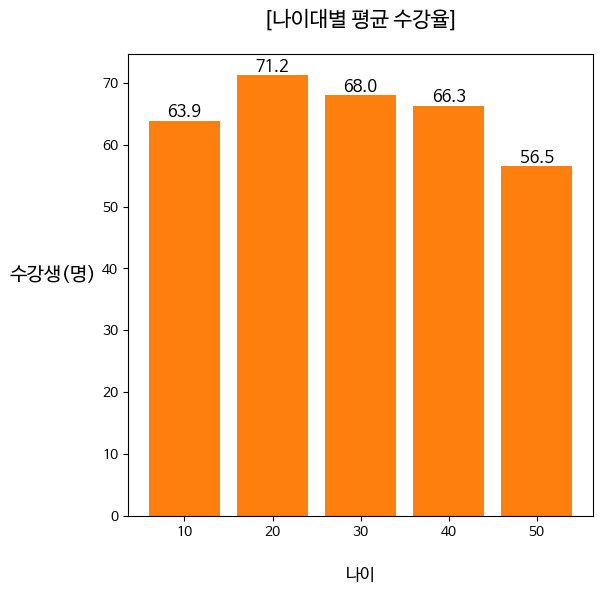

In [5]:
plt.figure(figsize=(6,6))
plt.xticks([10,20,30,40,50])
plt.bar(average.index, average,width=8)

bar = plt.bar(average.index, average,width=8)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.title('[나이대별 평균 수강율]',fontsize=15,pad=20)
plt.xlabel('나이',fontsize=12,labelpad=20)
plt.ylabel('수강생(명)',fontsize=14,rotation=360,labelpad=35)
plt.show()

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [7]:
managed = ['TRUE','FALSE']
managed

['TRUE', 'FALSE']

In [8]:
managed_data_avg = student_data.groupby('managed')['progress_rate'].sum()/student_data.groupby('managed')['_id'].count()
managed_data_avg

,0
managed,
False,38.587119
True,68.466171


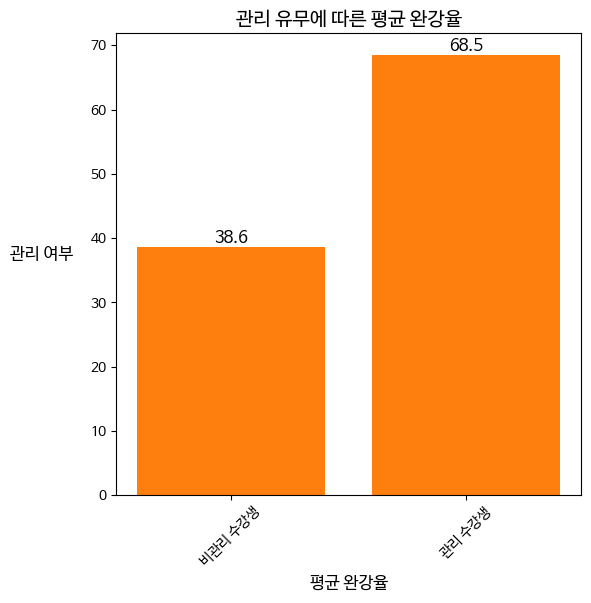

In [9]:
plt.figure(figsize=(6,6))
plt.bar(managed_data_avg.index,managed_data_avg.values)
bar = plt.bar(managed_data_avg.index,managed_data_avg.values)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.title('관리 유무에 따른 평균 완강율',fontsize=14)
plt.xlabel('평균 완강율',fontsize=12)
plt.xticks([0,1], labels=["비관리 수강생","관리 수강생"])
plt.ylabel('관리 여부',fontsize=12,rotation=360,labelpad=35)
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [10]:
cohort_data = pd.read_csv('cohort_data.csv')
cohort_data.tail()

,created_at,user_id,name,progress_rate
1731,2022. 8. 22,223c84b864342521,예채원,100
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100
1733,2022. 9. 6,5642de61e1a3711e,추민준,53
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100
1735,2022. 8. 15,24d978f6429a5af4,안유림,100


In [11]:
print(type(cohort_data['created_at'][1]))

<class 'str'>


In [12]:
format='%Y-%m-%dT%H:%M:%S.%f'
cohort_data['start_time'] = pd.to_datetime(cohort_data['created_at'], format='mixed',infer_datetime_format=True)
cohort_data.tail()

<ipython-input-12-5cede24d9f77>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cohort_data['start_time'] = pd.to_datetime(cohort_data['created_at'], format='mixed',infer_datetime_format=True)


,created_at,user_id,name,progress_rate,start_time
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15
1735,2022. 8. 15,24d978f6429a5af4,안유림,100,2022-08-15


In [13]:
cohort_data['start_week']= cohort_data['start_time'].dt.isocalendar().week
cohort_data.tail()

,created_at,user_id,name,progress_rate,start_time,start_week
1731,2022. 8. 22,223c84b864342521,예채원,100,2022-08-22,34
1732,2022. 8. 22,8f9795f7fb32495b,하준희,100,2022-08-22,34
1733,2022. 9. 6,5642de61e1a3711e,추민준,53,2022-09-06,36
1734,2022. 8. 15,5f29bdba68615d6a,옥건,100,2022-08-15,33
1735,2022. 8. 15,24d978f6429a5af4,안유림,100,2022-08-15,33


In [14]:
category_range = set(cohort_data['start_week'])
category_range

{31, 32, 33, 34, 35, 36}

In [15]:
progress_rate = list(cohort_data['progress_rate'])
bins = [0,4.11,26.03,41.10,61.64,80.82,100]
labes=[0,1,2,3,4,5]
#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts

[5, 5, 2, 5, 5, ..., 5, 5, 3, 5, 5]
Length: 1736
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [16]:
cuts = pd.DataFrame(cuts)
cuts.tail()

,0
1731,5
1732,5
1733,3
1734,5
1735,5


In [20]:
cohort_data = pd.concat([cohort_data,cuts],axis=1, join='inner')
cohort_data.head()

,created_at,user_id,name,progress_rate,start_time,start_week,0
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15,33,5
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08,32,5
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08,32,2
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01,31,5
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22,34,5


In [22]:
cohort_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week',"week"]
cohort_data.head()

,created_at,user_id,name,progress_rate,start_time,start_week,week
0,2022. 8. 15,237a15a4c854a19f,이시우,100,2022-08-15,33,5
1,2022. 8. 8,9e39ebcdb3e41fdb,경서희,100,2022-08-08,32,5
2,2022. 8. 8,ccd9564adf22a5f7,지소희,36,2022-08-08,32,2
3,2022. 8. 1,291ad78f3adfa9ee,최가은,100,2022-08-01,31,5
4,2022. 8. 22,dfa8afb8ada36a4a,설서영,100,2022-08-22,34,5


In [24]:
grouping = cohort_data.groupby(['start_week','week'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)
cohort_data.head()

<ipython-input-24-bdc3c878fbcb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouping = cohort_data.groupby(['start_week','week'])


user_id
start_week week         
31         0           5
           1          14
           2          14
           3          16
           4          14

In [26]:
f = 31
for i in range(6):
  for j in range(5, 0, -1):
    cohort_data.at[(f, j-1), 'user_id'] = int(cohort_data.at[(f,j), 'user_id']) + int(cohort_data.at[(f, j-1), 'user_id'])
  f = f + 1

In [27]:
cohort_data2 = cohort_data.reset_index()
cohort_data2.head()

,start_week,week,user_id
0,31,0,397
1,31,1,392
2,31,2,378
3,31,3,364
4,31,4,348


In [28]:
cohort_counts = cohort_data2.pivot(index='start_week',
                                   columns='week',
                                   values='user_id')
cohort_counts.head()

week,0,1,2,3,4,5
start_week,,,,,,
31,397,392,378,364,348,167
32,364,360,343,295,233,213
33,315,303,268,228,202,184
34,277,263,232,216,203,169
35,351,302,276,260,234,198


In [29]:
retention = cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

,0
start_week,
31,397
32,364
33,315
34,277
35,351


In [30]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

week,0,1,2,3,4,5
start_week,,,,,,
31,1.0,0.987406,0.952141,0.916877,0.876574,0.420655
32,1.0,0.989011,0.942308,0.810440,0.640110,0.585165
33,1.0,0.961905,0.850794,0.723810,0.641270,0.584127
34,1.0,0.949458,0.837545,0.779783,0.732852,0.610108
35,1.0,0.860399,0.786325,0.740741,0.666667,0.564103


In [31]:
retention.round(3)*100

week,0,1,2,3,4,5
start_week,,,,,,
31,100.0,98.7,95.2,91.7,87.7,42.1
32,100.0,98.9,94.2,81.0,64.0,58.5
33,100.0,96.2,85.1,72.4,64.1,58.4
34,100.0,94.9,83.8,78.0,73.3,61.0
35,100.0,86.0,78.6,74.1,66.7,56.4
36,100.0,98.1,93.9,90.3,85.5,39.7


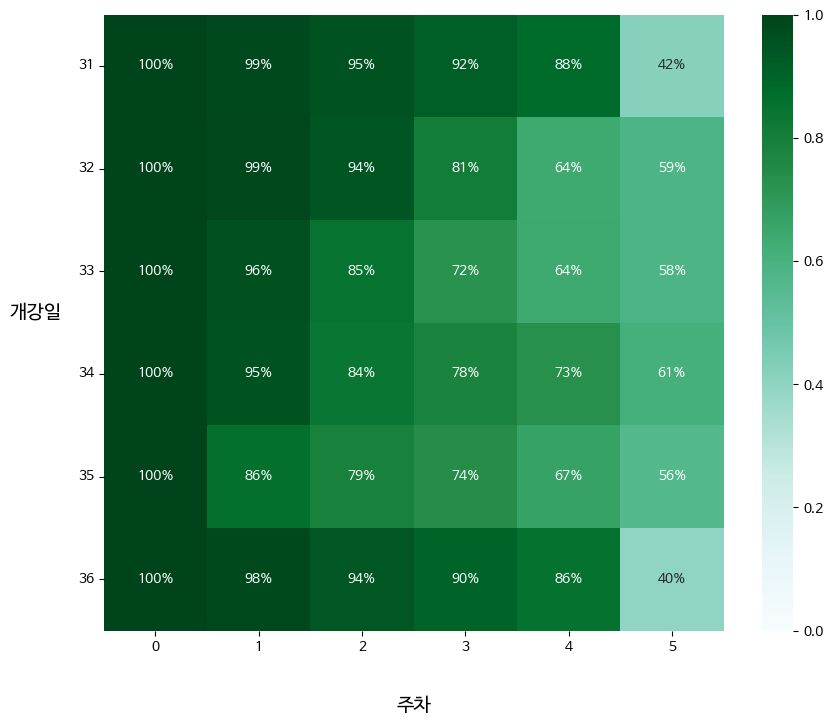

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0,
            vmax=1,
            cmap="BuGn")

plt.xlabel('주차', fontsize=14, labelpad=30)
plt.ylabel('개강일', fontsize=14, rotation=360, labelpad=30)
plt.yticks(rotation=360)
plt.show()